In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from google.colab import files
uploaded = files.upload()

Saving startup_funding.csv to startup_funding.csv


In [2]:
df = pd.read_csv("startup_funding.csv")
df.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
y = []
for i in df["Date"].values:
    if '.' in i:
        y.append(i.split('.')[-1])
    else:
        y.append(i.split('/')[-1])
df["Year"] = y
p = df["Year"].value_counts()
year = p.index
q = np.argsort(year)
fund = p.values
for i in q:
    print(year[i],fund[i])

2015 936
2016 993
2017 443


In [ ]:
df = pd.read_csv("startup_funding.csv")
df["CityLocation"].dropna(inplace = True)
d = {}
for i in df["CityLocation"]:
    d[i] = d.get(i,0) + 1
    
d["Bangalore"] += d["bangalore"] - d['SFO / Bangalore'] - d['Seattle / Bangalore']
d["New Delhi"] += d["Delhi"]
d["Hyderabad"] -= d["Goa/Hyderabad"] - d['Dallas / Hyderabad'] 
del d["bangalore"]
del d["Delhi"]
del d["Goa/Hyderabad"]
del d['Dallas / Hyderabad']

d1 = sorted(d, key=d.get, reverse=True)
c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = 0
    c += 1
    
for i in d2:
    for j in d :
        if i in j:
            d2[i] += d[j]
              
x = []
y = []
for i in d2:
    print(i,d2[i])
    x.append(i)
    y.append(d2[i])
plt.axis("equal")
plt.pie(y,labels = x)
plt.show()

TypeError: ignored

In [4]:
def modified(amount):
    return int(amount.replace(',',''))
def city(c):
    c = str(c)
    return c.split("/")[0].strip()

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["CityLocation"].fillna('',inplace = True)
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["CityLocation"] = df["CityLocation"].apply(city)
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)
df = df[df["CityLocation"] != ""]
a = df["CityLocation"]
b = df["AmountInUSD"]
d = {}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
    
d1 = sorted(d, key=d.get , reverse=True) 
c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = d2.get(i,0) + d[i]
    c += 1
sum = 0
for i in d2.values():
    sum += i
for i in d2:
    print(i,format(d2[i]*100/sum,"0.2f"))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


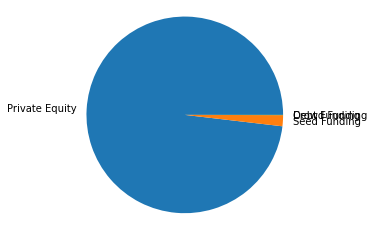

In [5]:
def modified(amount):
    return int(amount.replace(',',''))

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["InvestmentType"].fillna("",inplace = True)
df = df[df["InvestmentType"] != ""]
a = df["InvestmentType"]
b = df["AmountInUSD"]
d ={}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]

d['Seed Funding'] += d['SeedFunding']
d['Private Equity'] += d['PrivateEquity']
d['Crowd Funding'] += d['Crowd funding']

del d['SeedFunding']
del d['PrivateEquity']
del d['Crowd funding']

sum = 0
for i in d:
    sum += d[i]
for i in d:
    print(i,format(d[i]*100/sum,"0.2f"))
plt.pie(d.values(),labels = d.keys())
plt.axis("equal")
plt.show()

In [6]:
def modified(amount) :
    return int(amount.replace(",",""))

df = pd.read_csv("startup_funding.csv")
df["IndustryVertical"].fillna("", inplace = True)
df["AmountInUSD"].fillna("0", inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)

df["IndustryVertical"].replace("ECommerce","Ecommerce",inplace = True)
df["IndustryVertical"].replace("eCommerce","Ecommerce",inplace = True)
df["IndustryVertical"].replace("ecommerce","Ecommerce",inplace = True)

df = df[df["IndustryVertical"] != ""]
x = df["IndustryVertical"]
y = df["AmountInUSD"]

D = {}
for i in x.index :
    D[x[i]] = D.get(x[i], 0) + y[i]
    
D1 = sorted(D, key=D.get , reverse=True) 
D1 = D1[:5]

D2 = {}
for i in D1:
    D2[i] = D[i]
    
sum = 0
for i in D2:
    sum += D2[i]
    
for i in D2:
    print(i,format(D2[i]*100/sum,"0.2f"))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [7]:
def modified(amount) :
    return int(amount.replace(",",""))

df = pd.read_csv("startup_funding.csv")
df["AmountInUSD"].fillna("0",inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["StartupName"].fillna("", inplace = True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df = df[df["StartupName"] != ""]
x = df["StartupName"]
y = df["AmountInUSD"]

D = {}
for i in x.index :
    D[x[i]] = D.get(x[i], 0) + y[i]

D1 = sorted(D, key = D.get, reverse = True)
D1 = D1[:5]

for i in D1 :
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [8]:
def modified(amount) :
    return int(amount.replace(",",""))

df = pd.read_csv("startup_funding.csv")
df["AmountInUSD"].fillna('0', inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["StartupName"].fillna("", inplace = True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df = df[df["StartupName"] != ""]
x = df["StartupName"]
y = df["AmountInUSD"]

D = {}
for i in x :
    D[i] = D.get(i,0) + 1
D1 = sorted(D, key = D.get, reverse = True)
D1 = D1[:5]

for i in D1 :
    print(i, D[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [19]:
def modified(amount) :
    return int(amount.replace(",",""))

df = pd.read_csv("startup_funding.csv")
df.dropna(subset = ["InvestorsName"],inplace = True)
df["InvestorsName"] = df["InvestorsName"].str.replace(",\xa0 ",",")
df["InvestorsName"] = df["InvestorsName"].str.replace(", ",",")
Dict = {}
for i in df["InvestorsName"]:
    if "," in i:
        j = i.strip().split(',')
        for a in j:
            Dict[a] = Dict.get(a,0) + 1
    else:
        Dict[i] = Dict.get(i,0) + 1
D = sorted(Dict, key = Dict.get, reverse=True)
print(D[0], Dict[D[0]])

Sequoia Capital 64


In [ ]:
def make_dictionary(arr):
    dictionary={}
    for i in arr:
        '''We do not need to take the Undisclosed Investors and also the investors with blank name'''
        if i=='Undisclosed Investors' or i=='Undisclosed investors' or i=='':
            continue
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                elif j.strip()!="":
                    dictionary[j.strip()]=1
    return dictionary
    df["InvestorsName"].value_counts()